In [1]:
class NeuralNetwork():
    """This class implements a multi-perceptron
       with backpropagation. This handles a simple logic
       such as OR, AND, NAND, and NOR gates, including XOR."""
    
    def __init__(self, net_arch, eta = 0.1, epochs = 10000, random_seed = 1):
        self.layers = len(net_arch)
        self.net_arch = net_arch
        self.eta  = eta
        self.epochs = epochs
        self.random_seed = random_seed
        
    def g(self, x):
        return 1 / (1 + np.exp((-x)))
    
    def g_prime(self, x):
        return self.g(x) * (1 - self.g(x))
    
    def fit(self, X, Y):
        np.random.seed(self.random_seed)
        W1_shape = (self.net_arch[(1)], self.net_arch[(0)])
        W2_shape = (self.net_arch[(2)], self.net_arch[(1)])
        self.W1 = 2 * np.random.random(W1_shape) - 1
        self.W2 = 2 * np.random.random(W2_shape) - 1
        
        self.cost_ = []
        
        for _ in range(self.epochs):
            #순전파: 입력층 --> 은닉층 --> 출력층
            A0 = X
            Z1 = np.dot(self.W1, A0)
            A1 = self.g(Z1)
            Z2 = np.dot(self.W2, A1)
            A2 = self.g(Z2)
            
            #역전파
            E2 = Y - A2
            E1 = np.dot(self.W2.T, E2)
            
            dZ2 = E2 * self.g_prime(Z2)
            dZ1 = E1 * self.g_prime(Z1)
            
            self.W2 += np.dot(dZ2, A1.T)
            self.W1 += np.dot(dZ1, A0.T)
            
            #몇번 반복하면서 학습을 했는지를 알려준다 --> 제곱을하고 루트를 씌운 이유는 음수를 양수로 바꿔줌. 
            self.cost_.append(np.sqrt(np.sum(E2 * E2)))
        return self
    
    def net_input(self, X):      #가중치와 입력값을 내적하는 조건문.
        if X.shape[0] == self.w.shape[0]:
            return np.dot(X, self.w)
        else:
            return np.dot(X, self.w[1:]) + self.w[0]
        
    def predict(self, X):      #순전파를 통해 y_hat을 구함.
        Z1 = np.dot(self.W1, X)
        A1 = self.g(Z1)
        Z2 = np.dot(self.W2, A1)
        A2 = self.g(Z2)
        return A2

In [2]:
import numpy as np
nn = NeuralNetwork(net_arch = [2, 3, 1], epochs = 1000) #net_arch를 통해 입력층 2게, 은닉층 3게, 출력층 1개.
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) #전치된 형태.
Y = np.array([0, 1, 1, 0]) 
nn.fit(X, Y) #fit함수를 통해서, 순전파와 역전파 과정을 거치면서 가중치가 조정된다.
print("Final prediction of all")
A2 = nn.predict(X)

#predict가 0.5라는 것은 맞을 수도 있고, 틀릴수도 있는 것 --> 학습을 잘못함 --> 아래에서 그래프로 시각화.
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

Final prediction of all
[0 0] [0.048]
[0 1] [0.955]
[1 0] [0.499]
[1 1] [0.501]


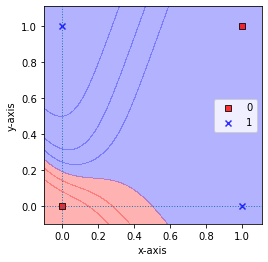

In [3]:
#학습이 잘못됐다. (1,1)을 1로 분류하는 중 --> 이를 시각화
import joy
import matplotlib.pyplot as plt
%matplotlib inline
joy.plot_decision_regions(X.T, Y, lambda Z: nn.predict(Z.T))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc = 'best')
plt.show()

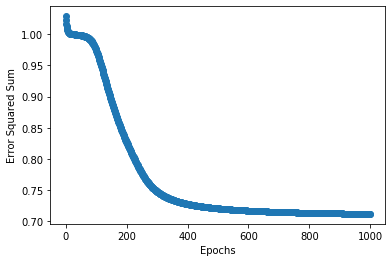

In [4]:
#반복횟수에 따른, error값을 보여준다. 0.7로 수렴하는 것으로 보아 반복횟수의 문제는 아니다.
plt.plot(range(len(nn.cost_)), nn.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

In [14]:
#은닉층의 노드개수를 3개에서 4개로 바꿔주었다. 
nn = NeuralNetwork(net_arch = [2, 4, 1], epochs = 1000)  
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([0, 1, 1, 0])
nn.fit(X, Y)
print("Final prediction of all")
A2 = nn.predict(X)
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

Final prediction of all
[0 0] [0.077]
[0 1] [0.935]
[1 0] [0.94]
[1 1] [0.043]


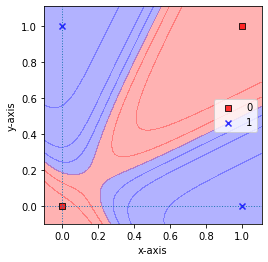

In [15]:
joy.plot_decision_regions(X.T, Y, lambda z : nn.predict(z.T))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc = 'best')
plt.show()

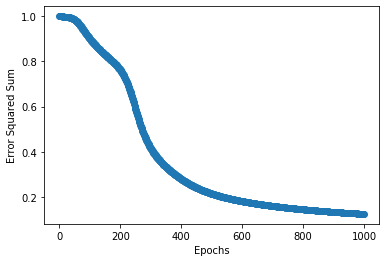

In [7]:
#반복횟수에 따른, error값을 보여준다. 0.7로 수렴하는 것으로 보아 반복횟수의 문제는 아니다.
plt.plot(range(len(nn.cost_)), nn.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()